# IMAGE CLASSIFICATION OF CAR'S LOGO
In this task of classification of five different classes i have used the keras pretrained model VGG16.I simple downloaded
it and apply on my custom data after making a few changes.
The data set of each class consist of approx 55 images.So total images are approx 279.which are split into training and 
test data to form 223 training images and 56 validation images so as to make sure that the model is not overfitting
on the training data.Also we will check its accuracy on the validation data.



In [50]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
from keras.applications import VGG16

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input, decode_predictions

import os 
os.chdir("C:\\Users\\Vikas Bhardwaj\\Desktop\\carlogo\\train\\bmw")

In [51]:

#testing on a image to resize it to array of dmension 224x224 and the rgb channnel of fixed size 3
#the shape of images hence becomes 224x224x3 as the image is colored.
img_path = '3-bmw-i3s-2019-lt-hero-bonnet-badge (1).jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print (x.shape)
x = np.expand_dims(x, axis=0)
print (x.shape)
#reshapning the dim so as to make the some sense (#imgs,height,width,rgb channel)
x = preprocess_input(x)
print('Input image shape:', x.shape)

(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [52]:
import os 
os.chdir("C:\\Users\\Vikas Bhardwaj\\Desktop\\carlogo")

# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '\\train'
data_dir_list = os.listdir(data_path)


# Data preprocessing
accessing the images from the directory and than coverting them into the numpy arrays.
Becouse as we know the deep learnog algorithms understant only numerical data.It is most;y
in the form of matix and the arrays with multi dimensions.

In [53]:
#importing the images from the file and converting each img into the shape which as shown above
#this dim of images we wll feeed them into the model which is a requirment of model.
#as model understand numerical data only so we converted ech image into numpy array.
img_data_list=[]
#iterating over the file contain train data. file contain five dir each for a single class.
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-audi

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

In [54]:
#giving shape like(#no. imags, ht, wdth,rgb chnl) similiar to above
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)


(279, 1, 224, 224, 3)
(1, 279, 224, 224, 3)
(279, 224, 224, 3)


In [55]:
# Define the number of classes
num_classes = 5
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
#creating labels for each class.By asssigning the different labels to each class.and same label for all images of eachclass
labels[0:53]=0
labels[53:113]=1
labels[113:169]=2
labels[169:220]=3
labels[220:280]=4
#giving a name to each class according to order they are present in directory
names = ['audi','bmw','chevrolet','jaguar','mercedes']



In [56]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


# training using the custom VGG16 model
We are getting an accuracy of approx 85%.

In [16]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()
#from the last layer of VGG16 model we removed it and we replace it with five labels as output
#bcause we are having five cls to predict.

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

In [17]:

for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


t=time.time()

In [58]:
# hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
# print('Training time: %s' % (t - time.time()))
# (loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

# print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

In [ ]:
#Getting the accuracy above ninty percent using the fine tuning the network

# fine tuning the network and Training
replacing the third last and second last fully connected layer from our model
and adding new layer of output with 128 unit.To check the accuracy of model if effected.
the accuracy  as we wll see increases using this fined tuned model.as the size of our data is small it
dont required a complex model to trained so we will replace the fully connected layrs with output unit of size 128 only.  


We are getting an accuracy of approx 91%


In [343]:

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()
#replacing the third last and second last fully connected layer from our model
# and adding new layer of output with 128 unit.
last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()

# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
	layer.trainable = False

custom_vgg_model2.summary()

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

t=time.time()
#	t = now()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

# the over all accuracy of the model is 91percent approx as we required


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Analysis model using Visualization

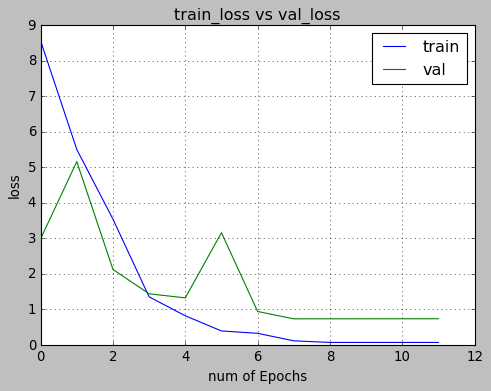

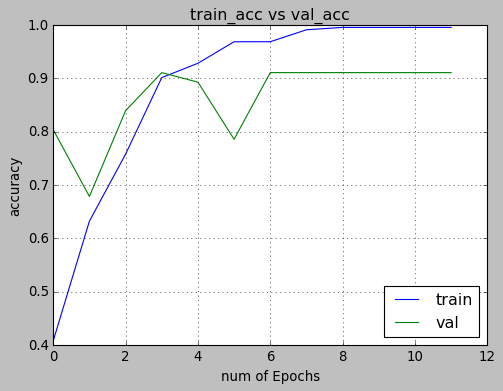

In [433]:
#analysis the model using the graph.
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(12)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


#as we can see the loss is decreasing as the number epochs are are increasing this means model is performing 
#well or error is less as we ar  increasing the epochs finally the the loss becomes constant after the 10 epochs means 
# there is no decreae in loss after 10 epochs

#in second grph the train accuracy $ test accuracy  vs epochs the train accuracy is increasing means the model is learning better
#at each epochs finally it is becoming the apporx to one means 100 % accuracy approx. similiar the validation accuracy
#it is first increasing means model is getting good performanceon test set as epochs increases and finally it becomes 
#constant with approx 91 percent accuracy. 

# Prediction the test images.
firtly we wll import the image convert it into numpy array.Expanding  and then predicting.

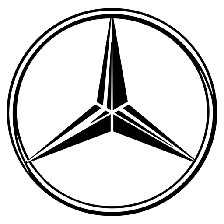

In [44]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Vikas Bhardwaj\\Desktop\\carlogo\\test\\mercedes\\mercedes-1-202838.png', target_size = (224, 224))
# This is test img
# first arg is the path
# img is 64x64 dims this is what v hv used in training so wee need to use exactly the same dims
# here also

test_image



# In[ ]:


In [45]:
test_image = image.img_to_array(test_image)
# Also in our first layer below it is a 3D array
# Step 1 - Convolution
# classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# this will convert from a 3D img to 3D array
test_image # shld gv us (64,64,3)

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [46]:

test_image = np.expand_dims(test_image, axis = 0)
# axis specifies the position of indx of the dimnsn v r addng
# v need to add the dim in the first position
test_image # now it shld show (1,64,64,3)


array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [47]:
#the label are in order of
'''
1.Audi
2.Bmw
3.chevrolet
4.jaguar
5.Mercedes

'''
#we can see the probability of being third element is more.Hence it is Chevrolet which is correct.

result = custom_vgg_model.predict(test_image)
result

array([[8.2760689e-06, 2.9503381e-06, 3.1796353e-05, 8.1792750e-06,
        9.9994874e-01]], dtype=float32)

8.276069e-06

# Saving the models

In [437]:
#saving the vgg16 model using the pickel
import pickle
with open ("fined_tuned_vgg16",'wb') as carlogo:
    pickle.dump(custom_vgg_model2,carlogo)

In [28]:

with open ("fined_tuned_vgg16",'rb') as carlogo:
    mp=pickle.load(carlogo)

EOFError: Ran out of input

In [438]:
#savin the fined tuned vgg16 model using thee pickel
import pickle
with open ("custom_vgg16",'wb') as carlogo1:
    pickle.dump(custom_vgg_model,carlogo1)

In [22]:
import pickle
with open ("custom_vgg16",'rb') as carlogo1:
    mp=pickle.load(carlogo1)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
